**Question 1 :** Run agglomerative cluster analysis using different linkage methods based on quantitative environmental
variables (see previous exercise), using sites from the Douro and Tejo basins.

In [40]:
# Libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [41]:
# Load the data and subset it
df1 = pd.read_csv('/content/EFIplus_medit.zip', compression='zip', sep=";")
df = df1[(df1['Catchment_name'] == 'Tejo') | (df1['Catchment_name'] == "Douro")]

# Select the variables of interest
columns = ['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]

# Drop any rows with missing values and reset the index
df = df.dropna().reset_index(drop=True)

# Separate the quantitative environmental variables
X = df.drop("Catchment_name", axis=1)
y = df["Catchment_name"]

In [42]:
# Standardize the variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform agglomerative clustering with different linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
for method in linkage_methods:
    # Create the AgglomerativeClustering object
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method)

    # Fit the model to the scaled data
    clustering.fit(X_scaled)

    # Get the cluster labels
    labels = clustering.labels_

    # Print the results
    print(f"Clustering results using {method} linkage:")
    print(labels)
    print()

Clustering results using ward linkage:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 2 0 2 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0
 1 1 0 1 1 0 1 1 1 1 1 1 1 2 2 1 0 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 2 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

**Question 2 :** Plot a heatmap and a dendrogram by clustering the rows (sites) using average linkage 

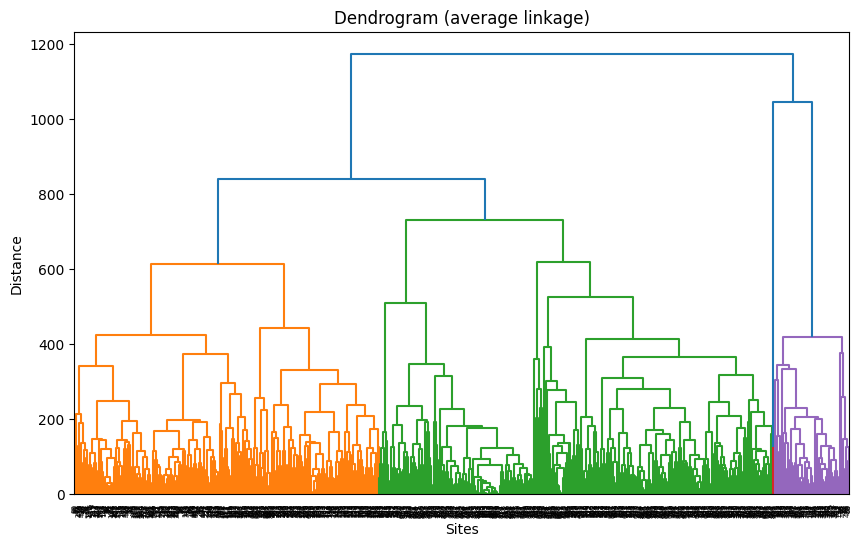

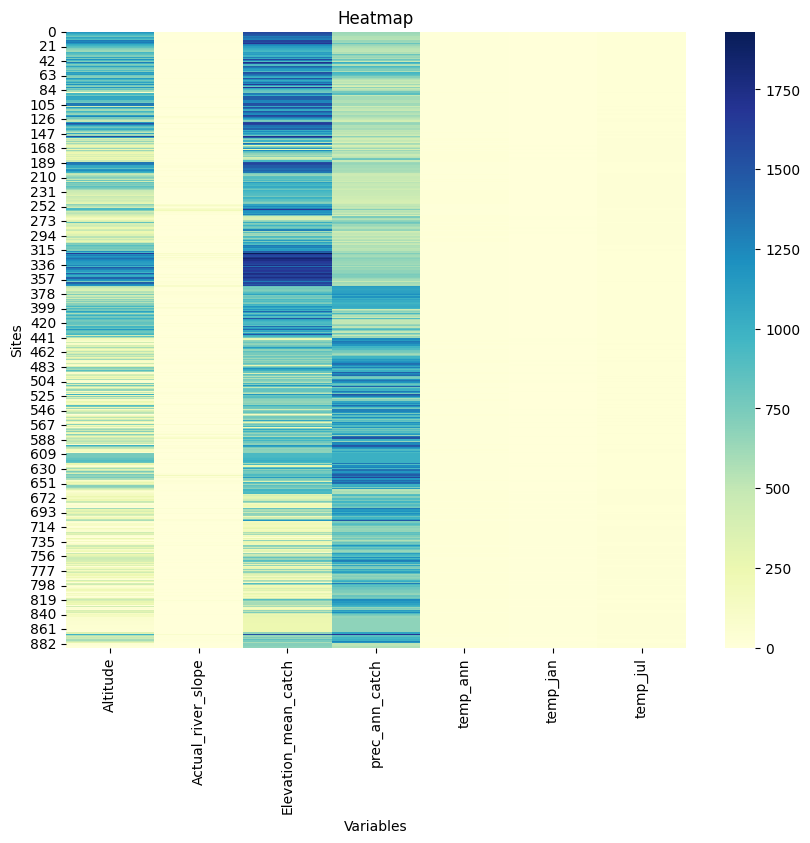

In [43]:
# Perform agglomerative clustering with average linkage
linkage_method = 'average'
clustering = hierarchy.linkage(X, method=linkage_method)

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram = hierarchy.dendrogram(clustering)
plt.title(f"Dendrogram ({linkage_method} linkage)")
plt.xlabel("Sites")
plt.ylabel("Distance")
plt.show()

# Plot the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(X, cmap='YlGnBu')
plt.title("Heatmap")
plt.xlabel("Variables")
plt.ylabel("Sites")
plt.show()